In [1]:
from mkmeans import *

from sklearn.cluster import KMeans

from sklearn.datasets import make_circles

# conda install graphviz
# conda install python-graphviz
from graphviz import Graph

In [2]:
# data set i
X_circles, y_circles = make_circles(n_samples=(600, 600), noise=0.1, factor=0.3, random_state=123)

In [5]:
# data set ii
path = np.loadtxt("/home/kober/Documents/pathbased.txt") # from http://cs.joensuu.fi/sipu/datasets/
path_data = path[:,:2]

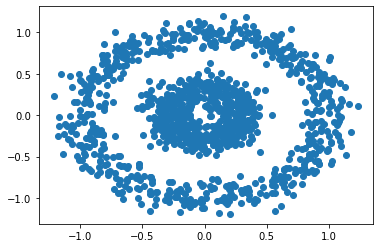

In [4]:
plt.scatter(X_circles[:,0], X_circles[:,1])

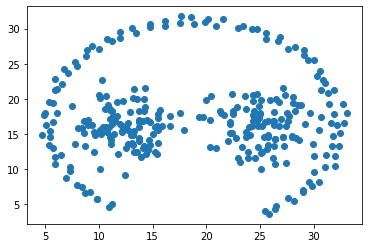

In [6]:
plt.scatter(path_data[:,0], path_data[:,1]) # see the other notebook for macrocluster visualization

In [7]:
model_circles = KMeans(n_clusters=25).fit(X_circles)

In [8]:
model_path = KMeans(n_clusters=20).fit(path_data)

In [9]:
new_labels_path = generate_macroclusters(X_circles, model_circles.cluster_centers_, model_circles.labels_)

In [10]:
new_labels_path = generate_macroclusters(path_data, model_path.cluster_centers_, model_path.labels_)

## Functions to create graphs

In [11]:
def calculate_members(X, cluster_centers, labels, ratio=None):
    """
    Calculates the amount of members each cluster center
    in a microcluster has.
    Used for graphviz plot
    """
    member_list=[]
    population=len(X)
    for i in np.arange(len(cluster_centers)):
        member=len(X[labels == i])
        if ratio != None:
            member=member/population
        member_list.append(member)    
    return member_list

In [12]:
def create_graph(X, cluster_centers, old_labels, with_members=None, ratio=None):
    """
    Creates a graphviz plot from the graph data.
    Can show how many members a cluster center has, or the ratio of 
    the members to all members.
    """
    radii = create_radius_list(X, cluster_centers, old_labels)
    cc_list = create_adjacency_list(cluster_centers, radii)
    members = calculate_members(X, cluster_centers, old_labels)
    nodes = []
    for i in np.arange(len(cc_list)):
        for j in cc_list[i]:
            if i != j:
                nodes.append((i,j))
    graph = Graph("Two circles graph representation", strict=True)
    for j in nodes:
        graph.edge(str(j[0]), str(j[1]))
    for i in np.arange(len(cc_list)):
        if with_members != None:
            graph.node(str(i), str(i)+": "+str(members[i]))
        else:
            graph.node(str(i))
    return graph

In [13]:
graph1 = create_graph(X_circles, model_circles.cluster_centers_, model_circles.labels_, 
             with_members=True, ratio=None)

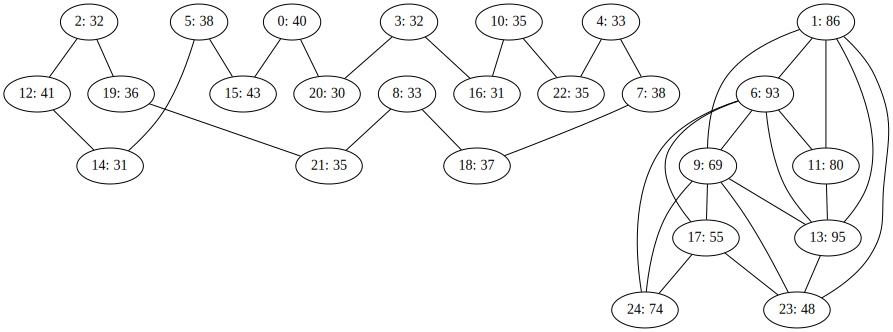

In [14]:
graph1

In [15]:
graph2 = create_graph(path_data, model_path.cluster_centers_, model_path.labels_, 
             with_members=True, ratio=None)

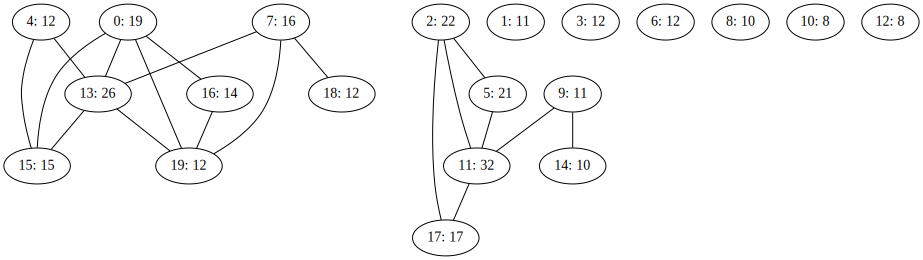

In [16]:
graph2